# t-SNE

going to try using kmeans labels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cluster_utils as cu
import db_utils as db
import os
import pandas as pd
import importlib

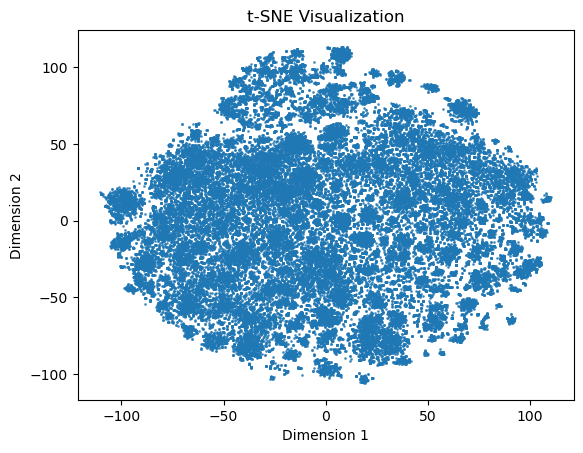

In [2]:
# get folder outside current directory (project folder)
current_dir = os.path.dirname(os.getcwd())
proj_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Load the 2D coordinates
coordinates = np.load(proj_dir + "/dataset/pubmed_20241121_working_memory.embd.npy")

# Scatter plot
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=1, alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [3]:
coordinates.shape

(73763, 2)

## Clustering

### hdbscan

In [3]:
%pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


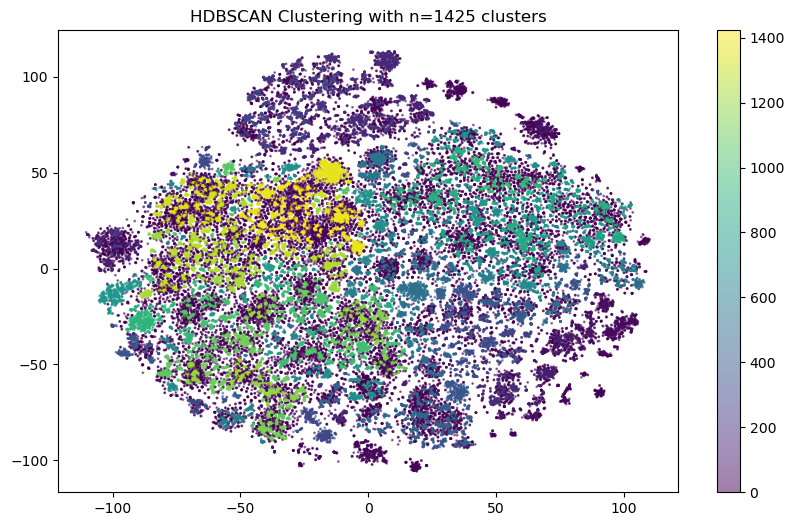

In [ ]:
importlib.reload(cu)
hdbscan_labels = cu.hdbscan_cluster(coordinates, min_cluster_size=10, gen_min_span_tree=True, plot=1)

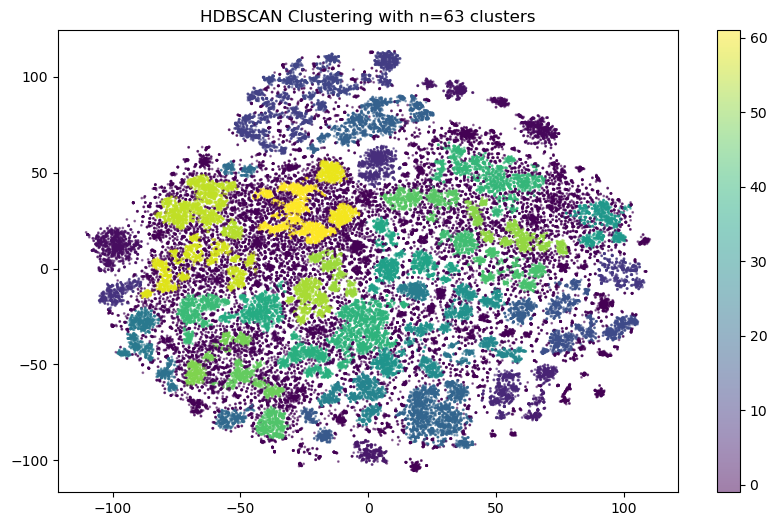

In [4]:
importlib.reload(cu)
hdbscan_labels = cu.hdbscan_cluster(coordinates, 
                                    min_cluster_size=250, min_samples=50, 
                                    plot=1)

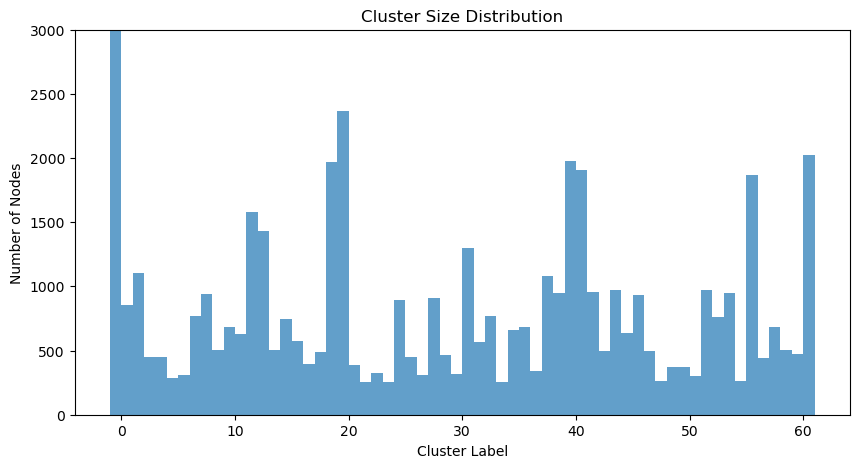

In [5]:
# plot cluster size distribution

plt.figure(figsize=(10, 5))
plt.hist(hdbscan_labels, bins=np.arange(-1, hdbscan_labels.max()+1, 1), alpha=0.7)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Nodes")
plt.ylim(0, 3000)
plt.show()

### K-means clustering

Let's start with a random number of clusters... (use same # found from hdbscan)

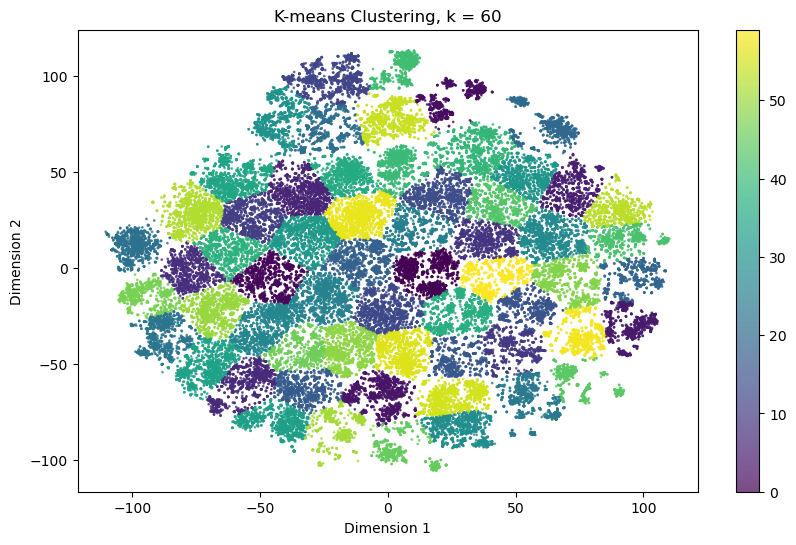

In [4]:
# Plot the clusters
importlib.reload(cu)
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=60, plot=1)

## Stats

In [5]:
df = pd.read_csv(
            proj_dir + "/dataset/pubmed_20241121_working_memory.raw",
            sep="\t"
        )

df.head()

pmid                                              title  \
0   710  Effect of two weeks' treatment with thioridazi...   
1  2563  EEG sleep studies of insomniacs under flunitra...   
2  2812  Alcohol and backward masking of visual informa...   
3  2813  Recovery of verbal short-term memory in alcoho...   
4  6497  Effect of counterconditioning on test anxiety ...   

                             journal  year  \
0                Psychopharmacologia  1975   
1   International pharmacopsychiatry  1975   
2      Journal of studies on alcohol  1976   
3      Journal of studies on alcohol  1976   
4  Journal of educational psychology  1976   

                                            abstract  \
0  Forty paid healthy male students participated ...   
1  This study investigates the effect of flunitra...   
2  Alcohol increased the time necessary to transf...   
3  When given a short-term memory distractor test...   
4                                                NaN   

                                          mesh_terms  \
0  Adult;Animals;Anti-Anxiety Agents;Bromazepam;C...   
1  Adult;Anti-Anxiety Agents;Dreams;Electroenceph...   
2  Adult;Dose-Response Relationship, Drug;Ethanol...   
3  Adult;Age Factors;Aged;Alcohol Amnestic Disord...   
4  Achievement;Adolescent;Anxiety;Behavior Therap...   

                                         mesh_topics  
0  pharmacology;blood;pharmacology;pharmacology;p...  
1  therapeutic use;drug effects;adverse effects;p...  
2             pharmacology;drug effects;drug effects  
3  complications;complications;drug effects;drug ...  
4                                                NaN

In [6]:
importlib.reload(db)
points_df = db._get_points_df(None,
                  path_tsv = proj_dir + "/dataset/pubmed_20241121_working_memory.raw",
                  delimiter = "\t",
                  points = coordinates,
                  )
points_df.head()

* loaded df
* merged embds to df


pmid                                         mesh_terms  \
0   710  Adult;Animals;Anti-Anxiety Agents;Bromazepam;C...   
1  2563  Adult;Anti-Anxiety Agents;Dreams;Electroenceph...   
2  2812  Adult;Dose-Response Relationship, Drug;Ethanol...   
3  2813  Adult;Age Factors;Aged;Alcohol Amnestic Disord...   
4  6497  Achievement;Adolescent;Anxiety;Behavior Therap...   

                                         mesh_topics          x          y  
0  pharmacology;blood;pharmacology;pharmacology;p...  63.622860  -0.946062  
1  therapeutic use;drug effects;adverse effects;p...  66.674393  -3.964462  
2             pharmacology;drug effects;drug effects  72.948692 -34.044613  
3  complications;complications;drug effects;drug ...  74.610733 -32.538921  
4                                                NaN -39.706505 -48.968933

### kmeans

In [7]:
print(np.unique(kmeans_labels))
print(len(kmeans_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
73763


In [8]:
from collections import defaultdict

cluster_terms = defaultdict(list)
for index, label in enumerate(kmeans_labels):

    mesh_terms = points_df.iloc[index, points_df.columns.get_loc("mesh_terms")]

    # Check if the 'mesh_terms' is NaN or missing
    if pd.isna(mesh_terms):
        continue  # Skip this iteration if mesh_terms is NaN

    # Otherwise, split the terms and add them to the cluster_terms
    cluster_terms[label].extend(
        [t for t in mesh_terms.split(";")]
    )

In [9]:
cluster_terms

defaultdict(list,
            {48: ['Adult',
              'Animals',
              'Anti-Anxiety Agents',
              'Bromazepam',
              'Chlorpromazine',
              'Clinical Trials as Topic',
              'Drug Synergism',
              'Ethanol',
              'Humans',
              'Male',
              'Memory, Short-Term',
              'Paired-Associate Learning',
              'Psychotropic Drugs',
              'Rabbits',
              'Receptors, Drug',
              'Sulpiride',
              'Thioridazine',
              'Adult',
              'Anti-Anxiety Agents',
              'Dreams',
              'Electroencephalography',
              'Female',
              'Flunitrazepam',
              'Humans',
              'Male',
              'Memory, Short-Term',
              'Middle Aged',
              'Sleep',
              'Sleep Initiation and Maintenance Disorders',
              'Sleep Stages',
              'Sleep, REM',
              'Wakefulness'

In [10]:
# Step 1: Extract unique values across all lists
unique_values = set(value for values in cluster_terms.values() for value in values)

# Step 2: Create a mapping of each unique value to an index
value_to_index = {value: idx for idx, value in enumerate(sorted(unique_values))}

# Step 3: Update the original dictionary to replace values with their indices
indexed_dict = {key: [value_to_index[value] for value in values] for key, values in cluster_terms.items()}


#### looking at most common terms overall

In [11]:
# get most common temrs in cluster_terms
from collections import Counter

# Step 1: Count the frequency of each index across all lists
term_counts = Counter(value for values in indexed_dict.values() for value in values)


In [13]:
# find corresponding words to term indices (for most common)

for term_index, count in term_counts.most_common(30):
    term = list(value_to_index.keys())[list(value_to_index.values()).index(term_index)]
    print(f"{term}: {count}")


Humans: 49176
Male: 36671
Female: 31371
Memory, Short-Term: 30263
Adult: 21116
Animals: 13330
Neuropsychological Tests: 12286
Cognition: 11885
Middle Aged: 11068
Young Adult: 10034
Adolescent: 9558
Attention: 9553
Memory: 8759
Aged: 8369
Child: 7338
Brain: 6958
Reaction Time: 6606
Magnetic Resonance Imaging: 5883
Rats: 5017
Cognition Disorders: 5013
Psychomotor Performance: 5000
Executive Function: 4954
Memory Disorders: 4632
Mental Recall: 4577
Brain Mapping: 4148
Visual Perception: 4104
Time Factors: 4001
Prefrontal Cortex: 3813
Hippocampus: 3766
Mice: 3700


#### returning to stats

In [14]:
print(len(indexed_dict[0]))
print(len(np.unique(indexed_dict[0])))

17635
1235


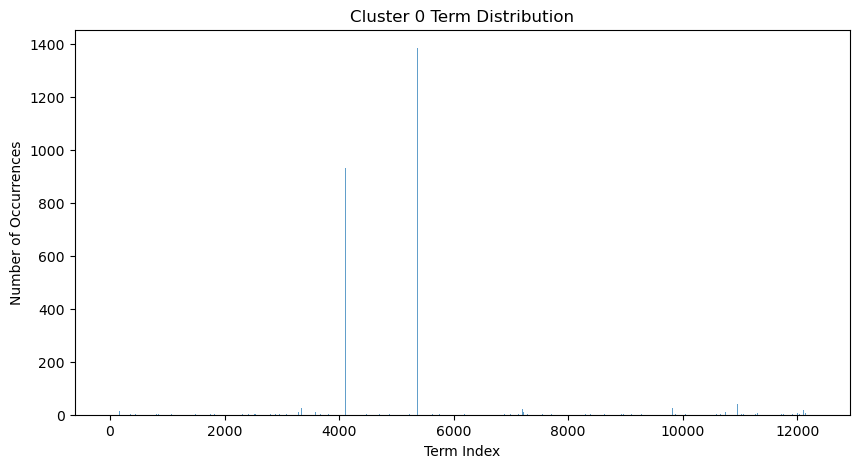

In [15]:
# plot the first key in the dictionary
plt.figure(figsize=(10, 5))
plt.hist(indexed_dict[0], bins=np.arange(0, len(value_to_index), 1), alpha=0.7)
plt.title("Cluster 0 Term Distribution")
plt.xlabel("Term Index")
plt.ylabel("Number of Occurrences")
# plt.ylim(0, 125)
plt.show()

In [16]:
# index to value
index_to_value = {idx: value for value, idx in value_to_index.items()}
# index_to_value

In [17]:
# get the top 5 terms for each cluster
for clus in indexed_dict:
    term_idx = indexed_dict[clus]
    term_freq = np.bincount(term_idx)
    most_freq_idx = np.argsort(term_freq)[-30:-25]
    most_freq_term = [index_to_value[idx] for idx in most_freq_idx]
    print(f"Cluster {clus}: {most_freq_term} ({term_freq[most_freq_idx]} occurrences)")

Cluster 48: ['Benzodiazepines', 'Mental Recall', 'Maze Learning', 'Brain', 'Ethanol'] ([ 84  87  97  98 111] occurrences)
Cluster 58: ['Affect', 'Pregnancy', 'Case-Control Studies', 'Alcoholic Intoxication', 'Substance-Related Disorders'] ([58 59 59 60 63] occurrences)
Cluster 46: ['Practice, Psychological', 'Reproducibility of Results', 'Inhibition, Psychological', 'Electroencephalography', 'Anxiety'] ([51 51 54 60 62] occurrences)
Cluster 39: ['Rats, Sprague-Dawley', 'Smell', 'Signal Transduction', 'Fear', 'Drosophila Proteins'] ([81 82 92 92 94] occurrences)
Cluster 22: ['Paired-Associate Learning', 'Speech', 'Cognition', 'Mental Recall', 'Middle Aged'] ([49 50 56 58 58] occurrences)
Cluster 14: ['Cognition', 'Learning', 'Neurons', 'Attention', 'Spatial Behavior'] ([103 105 106 110 113] occurrences)
Cluster 23: ['Neuropsychological Tests', 'Memory', 'Cochlear Implantation', 'Hearing Aids', 'Phonetics'] ([102 106 108 110 111] occurrences)
Cluster 0: ['Time Factors', 'Mental Recall', 

In [18]:
from scipy.stats import mannwhitneyu

In [19]:
# perform Mann-Whitney U tests for all combos of clusters

# Create a list of cluster labels
cluster_labels = list(indexed_dict.keys())

p_values = np.ones((len(cluster_labels), len(cluster_labels)))

for i, label1 in enumerate(cluster_labels):
    for j, label2 in enumerate(cluster_labels):
        if i >= j:
            continue

        # Perform Mann-Whitney U test (non-parametric test)
        u_stat, p_value = mannwhitneyu(indexed_dict[label1], indexed_dict[label2])
        p_values[i, j] = p_value
        p_values[j, i] = p_value


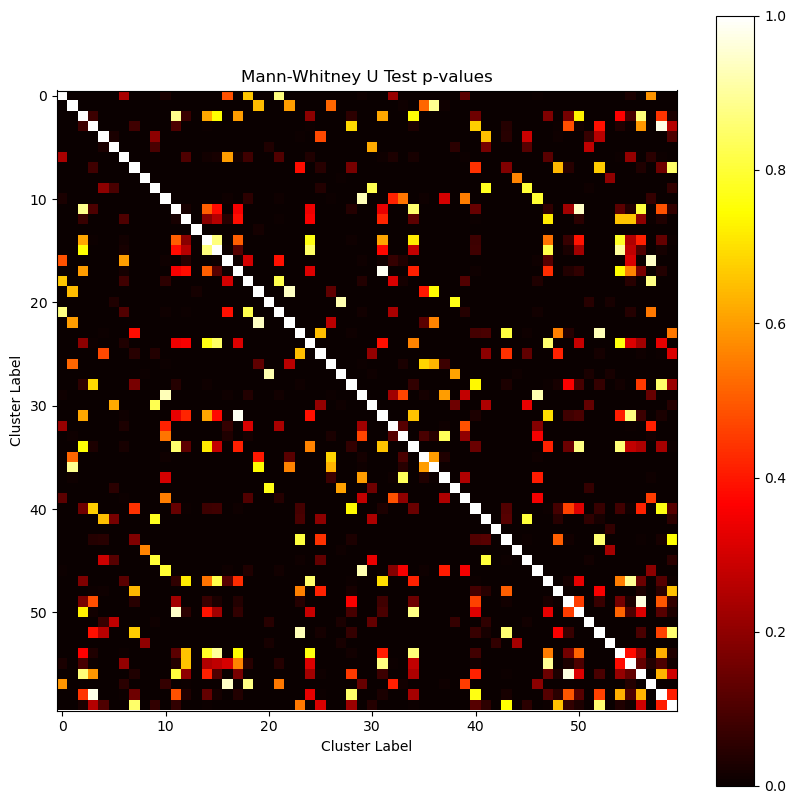

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(p_values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Mann-Whitney U Test p-values")
plt.xlabel("Cluster Label")
plt.ylabel("Cluster Label")
plt.show()

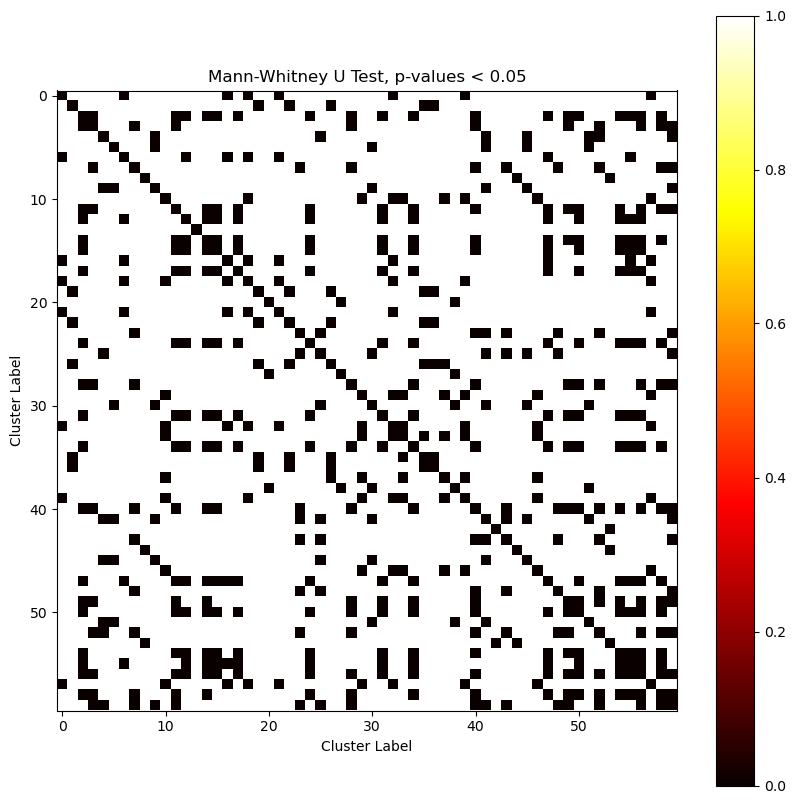

In [21]:
p_values_sig = np.where(p_values < 0.05, 1, 0)

plt.figure(figsize=(10, 10))
plt.imshow(p_values_sig, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Mann-Whitney U Test, p-values < 0.05")
plt.xlabel("Cluster Label")
plt.ylabel("Cluster Label")
plt.show()

In [22]:
# percentage of significant p-values
np.sum(p_values_sig) / (len(cluster_labels) ** 2)

0.8305555555555556